In [80]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile 

df=pd.read_excel("Diabetes Type1 Type2.xlsx")

df

,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Duration of diabetes (years),Fasting Plasma Glucose (mg/dl),...,Glycated Albumin (%),Total Cholesterol (mmol/L),Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no)
0,2,57,1.69,67.4,23.600000,0.0,non-drinker,T2DM,25.000000,82.44,...,14.9,4.07,0.61,2.28,1.86,105,68,245,4.9,yes
1,1,69,1.45,55.8,26.540000,0.0,non-drinker,T2DM,14.000000,137.7,...,15.3,4.36,0.89,1.36,2.89,41,101,337,5.6,yes
2,1,69,1.45,53.2,25.300000,0.0,non-drinker,T2DM,14.000000,138.42,...,17,4.28,0.93,1.13,2.94,39,103,262,3.7,no
3,2,57,1.70,70.0,24.221453,30.0,drinker,T2DM,10.000000,158.4,...,29.8,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,no
4,1,58,1.64,62.5,23.237656,0.0,non-drinker,T2DM,22.000000,194.4,...,19.5,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,non-drinker,T1DM,6.000000,250.2,...,20.1,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,yes
121,1,59,1.65,62.0,22.773186,0.0,non-drinker,T1DM,20.000000,117,...,24.9,5.46,1.77,0.9,4.25,71,78,351.16,5.13,yes
122,1,65,1.60,35.0,13.671875,0.0,non-drinker,T1DM,2.000000,117,...,71.1,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,no
123,1,51,1.64,74.0,27.513385,0.0,non-drinker,T1DM,17.000000,342,...,21,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,yes


In [2]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

# Data Preparation

In [81]:
#Change
df.columns = ['Gender','Age','Height','Weight','BMI','Smoking','Drinking','Type','diabetes','FPG','PPG','FCP','PCP','FI','PI','HbA1c','GA','Chole','Tr','HDLC','LDLC','Cr','EGFR','UA','BUN','Hyp']

In [11]:
#pip install movecolumn
#pip install sdv
#pip install ctgan
#pip install xgboost
#pip install --user pycaret
#pip install -U scikit-learn


In [82]:
# Move Type of Diabetes column to the last position in dataframe!

import movecolumn as mc
mc.MoveToLast(df,'Type')

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.600000,0.0,non-drinker,25.000000,82.44,162.36,...,4.07,0.61,2.28,1.86,105,68,245,4.9,yes,T2DM
1,1,69,1.45,55.8,26.540000,0.0,non-drinker,14.000000,137.7,277.74,...,4.36,0.89,1.36,2.89,41,101,337,5.6,yes,T2DM
2,1,69,1.45,53.2,25.300000,0.0,non-drinker,14.000000,138.42,277.2,...,4.28,0.93,1.13,2.94,39,103,262,3.7,no,T2DM
3,2,57,1.70,70.0,24.221453,30.0,drinker,10.000000,158.4,442.98,...,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,no,T2DM
4,1,58,1.64,62.5,23.237656,0.0,non-drinker,22.000000,194.4,238.5,...,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,no,T2DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,non-drinker,6.000000,250.2,372.96,...,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,yes,T1DM
121,1,59,1.65,62.0,22.773186,0.0,non-drinker,20.000000,117,176.58,...,5.46,1.77,0.9,4.25,71,78,351.16,5.13,yes,T1DM
122,1,65,1.60,35.0,13.671875,0.0,non-drinker,2.000000,117,329.76,...,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,no,T1DM
123,1,51,1.64,74.0,27.513385,0.0,non-drinker,17.000000,342,283.86,...,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,yes,T1DM


In [83]:
# Change values name in Type of Diabetes column!
# T1DM = Type 1 diabetes mellitus = 1
# T2DM = Type 2 diabetes mellitus = 2

replace_values = {'T1DM':1, 'T2DM':2}
df = df.replace({"Type": replace_values})

replace_values2 = {'non-drinker':0, 'drinker':1}
df = df.replace({"Drinking": replace_values2})

replace_values3 = {'no':0, 'yes':1}
df = df.replace({"Hyp": replace_values3})

In [84]:
# Rounding big nums to 2 decimals

import numpy as np

df['BMI'] = df['BMI'].apply(lambda r: np.round(r,decimals=2))
df['diabetes'] = df['diabetes'].apply(lambda r: np.round(r,decimals=2))

In [85]:
# drop rows that contain "/"

df = df.replace("/", "")

In [86]:
df = df.replace(r'', np.NaN)
df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.60,0.0,0,25.00,82.44,162.36,...,4.07,0.61,2.28,1.86,105.0,68.0,245.00,4.90,1,2
1,1,69,1.45,55.8,26.54,0.0,0,14.00,137.70,277.74,...,4.36,0.89,1.36,2.89,41.0,101.0,337.00,5.60,1,2
2,1,69,1.45,53.2,25.30,0.0,0,14.00,138.42,277.20,...,4.28,0.93,1.13,2.94,39.0,103.0,262.00,3.70,0,2
3,2,57,1.70,70.0,24.22,30.0,1,10.00,158.40,442.98,...,5.31,1.32,1.33,3.68,71.5,105.0,475.60,4.74,0,2
4,1,58,1.64,62.5,23.24,0.0,0,22.00,194.40,238.50,...,4.73,1.73,0.91,2.95,36.9,166.0,490.05,5.54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.69,0.0,0,6.00,250.20,372.96,...,4.55,1.57,0.77,3.29,54.9,100.0,285.12,5.37,1,1
121,1,59,1.65,62.0,22.77,0.0,0,20.00,117.00,176.58,...,5.46,1.77,0.90,4.25,71.0,78.0,351.16,5.13,1,1
122,1,65,1.60,35.0,13.67,0.0,0,2.00,117.00,329.76,...,5.15,0.68,1.98,2.71,22.6,286.0,140.32,2.98,0,1
123,1,51,1.64,74.0,27.51,0.0,0,17.00,342.00,283.86,...,4.64,1.03,1.48,2.46,30.4,214.0,196.92,4.88,1,1


# Fix Type1

In [113]:
df1= df[df['Type']== 1]

In [114]:
df1.isna().sum()

Gender      0
Age         0
Height      0
Weight      0
BMI         0
Smoking     0
Drinking    0
diabetes    0
FPG         0
PPG         2
FCP         1
PCP         1
FI          5
PI          6
HbA1c       1
GA          1
Chole       0
Tr          0
HDLC        0
LDLC        0
Cr          1
EGFR        1
UA          1
BUN         1
Hyp         0
Type        0
dtype: int64

In [115]:
df1['PPG'].fillna((df1['PPG'].mean()), inplace=True)
df1['FCP'].fillna((df1['FCP'].mean()), inplace=True)
df1['PCP'].fillna((df1['PCP'].mean()), inplace=True)
df1['FI'].fillna((df1['FI'].mean()), inplace=True)
df1['PI'].fillna((df1['PI'].mean()), inplace=True)
df1['HbA1c'].fillna((df1['HbA1c'].mean()), inplace=True)
df1['GA'].fillna((df1['GA'].mean()), inplace=True)
df1['Cr'].fillna((df1['Cr'].mean()), inplace=True)
df1['EGFR'].fillna((df1['EGFR'].mean()), inplace=True)
df1['UA'].fillna((df1['UA'].mean()), inplace=True)
df1['BUN'].fillna((df1['BUN'].mean()), inplace=True)

In [116]:
df1.reset_index(drop=True)

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,1,66,1.50,60.0,26.67,0.0,0,10.00,352.80,348.840000,...,3.59,1.02,0.86,2.01,37.300000,160.0,188.860000,6.470000,0,1
1,2,68,1.70,63.0,21.80,50.0,1,26.00,181.80,258.840000,...,4.78,2.20,0.93,3.28,66.800000,109.0,342.570000,6.050000,1,1
2,2,68,1.70,67.0,23.18,50.0,1,26.00,181.80,258.840000,...,4.78,2.20,0.93,3.28,69.400000,104.0,322.180000,3.060000,1,1
3,2,68,1.70,65.0,22.49,50.0,1,26.00,237.60,268.765714,...,3.49,1.82,0.84,1.83,63.700000,115.0,342.340000,6.210000,1,1
4,2,37,1.90,60.0,16.62,0.0,0,0.08,120.60,248.760000,...,5.61,1.14,1.08,3.95,49.600000,174.0,93.390000,1.850000,1,1
5,1,67,1.55,47.0,19.56,0.0,0,12.00,113.40,305.100000,...,4.57,0.91,1.27,2.76,45.200000,127.0,240.610000,3.980000,1,1
6,2,58,1.70,50.0,17.30,22.5,0,16.00,84.60,370.440000,...,4.05,0.46,1.57,2.12,75.400000,98.0,205.480000,3.960000,1,1
7,2,57,1.61,53.2,20.52,0.0,0,7.00,80.28,193.680000,...,4.44,0.68,1.97,2.57,74.000000,97.0,247.000000,6.400000,1,1
8,2,57,1.61,52.3,20.18,0.0,0,7.00,258.30,245.520000,...,5.12,0.64,1.88,2.93,82.000000,91.0,257.000000,6.400000,1,1
9,2,57,1.60,51.6,20.16,0.0,0,7.00,164.70,72.540000,...,4.27,0.54,1.72,2.63,73.000000,97.0,201.000000,7.300000,1,1


# Typ1 is ready to merge!

# Fix Type2 

In [125]:
df2= df[df['Type']== 2]

In [126]:
df2.isna().sum()

Gender       0
Age          0
Height       0
Weight       0
BMI          0
Smoking      0
Drinking     0
diabetes     0
FPG          3
PPG         22
FCP         23
PCP         45
FI          33
PI          55
HbA1c        8
GA          23
Chole       22
Tr          18
HDLC        18
LDLC        18
Cr          23
EGFR        24
UA          24
BUN         27
Hyp          0
Type         0
dtype: int64

# Filling Nan values with average of columns

In [127]:
df2['FPG'].fillna((df2['FPG'].mean()), inplace=True)
df2['PPG'].fillna((df2['PPG'].mean()), inplace=True)
df2['FCP'].fillna((df2['FCP'].mean()), inplace=True) 
df2['PCP'].fillna((df2['PCP'].mean()), inplace=True)
df2['FI'].fillna((df2['FI'].mean()), inplace=True)
df2['PI'].fillna((df2['PI'].mean()), inplace=True)
df2['HbA1c'].fillna((df2['HbA1c'].mean()), inplace=True)
df2['GA'].fillna((df2['GA'].mean()), inplace=True)
df2['Chole'].fillna((df2['Chole'].mean()), inplace=True)
df2['Tr'].fillna((df2['Tr'].mean()), inplace=True)
df2['HDLC'].fillna((df2['HDLC'].mean()), inplace=True)
df2['LDLC'].fillna((df2['LDLC'].mean()), inplace=True)
df2['Cr'].fillna((df2['Cr'].mean()), inplace=True)
df2['EGFR'].fillna((df2['EGFR'].mean()), inplace=True)
df2['UA'].fillna((df2['UA'].mean()), inplace=True)
df2['BUN'].fillna((df2['BUN'].mean()), inplace=True)

In [128]:
df2.isna().sum()

Gender      0
Age         0
Height      0
Weight      0
BMI         0
Smoking     0
Drinking    0
diabetes    0
FPG         0
PPG         0
FCP         0
PCP         0
FI          0
PI          0
HbA1c       0
GA          0
Chole       0
Tr          0
HDLC        0
LDLC        0
Cr          0
EGFR        0
UA          0
BUN         0
Hyp         0
Type        0
dtype: int64

# Merging df1 & df2

In [129]:
# unfy
df1 = df1.apply(lambda i: i.apply(lambda x: float(x)))
df2 = df2.apply(lambda i: i.apply(lambda x: float(x)))

In [159]:
frames = [df1, df2]

New_Data = pd.concat(frames)

New_Data

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
109,1.0,66.0,1.50,60.0,26.67,0.0,0.0,10.00,352.80,348.840000,...,3.590000,1.020000,0.860000,2.010000,37.300000,160.000000,188.860000,6.47000,0.0,1.0
110,2.0,68.0,1.70,63.0,21.80,50.0,1.0,26.00,181.80,258.840000,...,4.780000,2.200000,0.930000,3.280000,66.800000,109.000000,342.570000,6.05000,1.0,1.0
111,2.0,68.0,1.70,67.0,23.18,50.0,1.0,26.00,181.80,258.840000,...,4.780000,2.200000,0.930000,3.280000,69.400000,104.000000,322.180000,3.06000,1.0,1.0
112,2.0,68.0,1.70,65.0,22.49,50.0,1.0,26.00,237.60,268.765714,...,3.490000,1.820000,0.840000,1.830000,63.700000,115.000000,342.340000,6.21000,1.0,1.0
113,2.0,37.0,1.90,60.0,16.62,0.0,0.0,0.08,120.60,248.760000,...,5.610000,1.140000,1.080000,3.950000,49.600000,174.000000,93.390000,1.85000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2.0,66.0,1.72,62.0,20.96,0.0,0.0,7.00,180.00,234.000000,...,4.835632,1.792418,1.133626,3.121868,63.832558,116.678824,333.883294,6.04378,0.0,2.0
105,1.0,60.0,1.57,65.0,26.37,0.0,0.0,0.10,140.40,225.900000,...,4.835632,0.930000,2.060000,3.650000,63.832558,116.678824,333.883294,6.04378,0.0,2.0
106,1.0,71.0,1.70,66.8,23.11,0.0,0.0,20.00,162.00,288.000000,...,5.900000,2.210000,1.480000,3.890000,72.000000,73.000000,369.000000,6.04378,0.0,2.0
107,1.0,64.0,1.60,67.0,26.17,0.0,0.0,0.10,173.70,262.800000,...,4.835632,1.792418,1.133626,3.121868,63.832558,116.678824,333.883294,6.04378,0.0,2.0


In [160]:
from sklearn.model_selection import train_test_split

X = New_Data.drop('Type', axis=1)
y = New_Data['Type']

In [161]:
# Normalizing all the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [162]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=123)

# Finding Out The best Model Using PyCaret library!

In [163]:
import pandas as pd
from pycaret.classification import * 

In [164]:
#setting the experiment

experiment = setup(New_Data, target='Type',silent=True , fold_shuffle=True, session_id=2,use_gpu=True,preprocess=False)

,Description,Value
0,session_id,2
1,Target,Type
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(125, 26)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,3
8,Transformed Train Set,"(87, 25)"
9,Transformed Test Set,"(38, 25)"


In [165]:
#show the best model and their statistics
best_model = compare_models(turbo=True) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9889,0.0000,0.0000,0.0000,0.0000,nan,0.7661,0.0390
et,Extra Trees Classifier,0.9889,0.8000,0.0000,0.0000,0.0000,nan,0.7000,1.8450
catboost,CatBoost Classifier,0.9889,0.8000,0.0000,0.0000,0.0000,nan,0.7000,4.6930
dt,Decision Tree Classifier,0.9778,0.7438,0.0000,0.0000,0.0000,nan,0.6661,0.0430
rf,Random Forest Classifier,0.9778,0.8000,0.0000,0.0000,0.0000,nan,0.6000,4.6960
ada,Ada Boost Classifier,0.9778,0.7500,0.0000,0.0000,0.0000,nan,0.6661,0.3350
gbc,Gradient Boosting Classifier,0.9778,0.7500,0.0000,0.0000,0.0000,nan,0.6661,0.2820
lda,Linear Discriminant Analysis,0.9778,0.8000,0.0000,0.0000,0.0000,nan,0.7323,0.0580
nb,Naive Bayes,0.9444,0.6438,0.0000,0.0000,0.0000,nan,0.3875,0.0420
knn,K Neighbors Classifier,0.9097,0.5732,0.0000,0.0000,0.0000,nan,0.0000,0.1540


In [166]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '1': 11
Before OverSampling, counts of label '2': 89 

After OverSampling, the shape of train_X: (178, 25)
After OverSampling, the shape of train_y: (178,) 

After OverSampling, counts of label '1': 89
After OverSampling, counts of label '2': 89


Feature: 0, Score: 0.03407
Feature: 1, Score: 0.28576
Feature: 2, Score: -0.15163
Feature: 3, Score: 0.20491
Feature: 4, Score: 0.28879
Feature: 5, Score: -0.61764
Feature: 6, Score: 0.57040
Feature: 7, Score: -0.13484
Feature: 8, Score: -0.61287
Feature: 9, Score: 0.22177
Feature: 10, Score: 1.31146
Feature: 11, Score: 1.38133
Feature: 12, Score: 0.08990
Feature: 13, Score: -0.19351
Feature: 14, Score: 0.34974
Feature: 15, Score: 0.19844
Feature: 16, Score: -0.04469
Feature: 17, Score: 0.06800
Feature: 18, Score: -0.29750
Feature: 19, Score: -0.02178
Feature: 20, Score: -0.26240
Feature: 21, Score: 0.52295
Feature: 22, Score: 0.15987
Feature: 23, Score: 0.39781
Feature: 24, Score: -1.86362


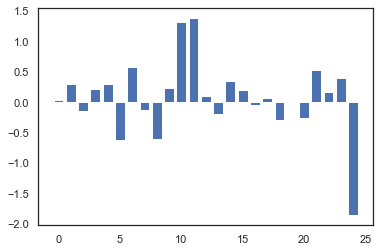

In [179]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()

# fit the model
model.fit(X_train_res, y_train_res)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From this chart we can see that the most imortant features are:

PPG: Postprandial Plasma Glucose (mg/dl)

FCP: Fasting C-peptide (nmol/L)

Hyp: Hypoglycemia 


# Confusion Matrix

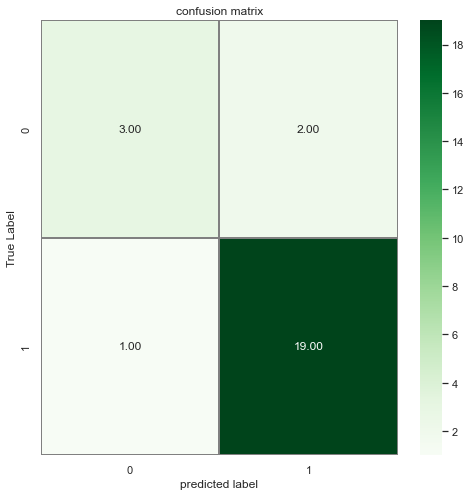

In [180]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)

confusion_mtx = confusion_matrix(y_test,Y_pred)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Classification Report

In [181]:
print(classification_report(y_test ,Y_pred))

              precision    recall  f1-score   support

         1.0       0.75      0.60      0.67         5
         2.0       0.90      0.95      0.93        20

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25



In [170]:
# An auxiliary function for converting a numeric result into a comprehensible result

def matcher(i):
    switcher={ 
        
            1: "Predcition result : Diabetes Type1",
            
            2: "Predicted result : Diabetes Type2",
            
             }
    return switcher.get(i,"unspecified")

In [173]:
value1 = input("Please enter Gender :\n")
value2 = input("Please enter Age :\n")
value3 = input("Please enter Height:\n")
value4 = input("Please enter Weight:\n")
value5 = input("Please enter BMI:\n")
value6 = input("Please enter Smoking years:\n")
value7 = input("Please enter Drinking or not?:\n")
value8 = input("Please enter diabetes years:\n")
value9 = input("Please enter FPG :\n")
value10 = input("Please enter PPG :\n")
value11 = input("Please enter FCP:\n")
value12 = input("Please enter PCP:\n")
value13 = input("Please enter FI:\n")
value14 = input("Please enter PI:\n")
value15 = input("Please enter HbA1c:\n")
value16 = input("Please enter GA:\n")
value17 = input("Please enter Chole :\n")
value18 = input("Please enter Tr :\n")
value19 = input("Please enter HDLC:\n")
value20 = input("Please enter LDLC:\n")
value21 = input("Please enter Cr:\n")
value22 = input("Please enter EGFR:\n")
value23 = input("Please enter UA:\n")
value24 = input("Please enter BUN:\n")
value25 = input("Please enter Hyp:\n")


Lista = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8),float(value9),float(value10),
          float(value11),float(value12),float(value13),float(value14),float(value15),
          float(value16),float(value17),float(value18),float(value19),float(value20),
          float(value21),float(value22),float(value23),float(value24),float(value25)]]

X=np.array(Lista).reshape(1,-1)

pred = model.predict(scaler.fit_transform(X))

ZZ=int(pred) 

result = matcher(ZZ)

print(f'out of enc {result}')   

#2	57	1.61 	52 	20.18 	0	non-drinker	7.00 	258.30 	245.52
#0.013 	0.010 	17.04 	445.80 	64 	27.00 	5.12 	0.64 	1.88 	2.93 	82.0 	91 	257.00 	6.40 	yes	T1DM

Please enter Gender :
2
Please enter Age :
57
Please enter Height:
1.61
Please enter Weight:
52
Please enter BMI:
20.18
Please enter Smoking years:
0
Please enter Drinking or not?:
0
Please enter diabetes years:
7.00
Please enter FPG :
258.30
Please enter PPG :
245.52
Please enter FCP:
0.013
Please enter PCP:
0.010
Please enter FI:
17.04
Please enter PI:
445.80
Please enter HbA1c:
64
Please enter GA:
27.00
Please enter Chole :
5.12
Please enter Tr :
0.64
Please enter HDLC:
1.88
Please enter LDLC:
2.93
Please enter Cr:
82.0
Please enter EGFR:
91
Please enter UA:
257.00
Please enter BUN:
6.40
Please enter Hyp:
1
out of enc Predicted result : Diabetes Type2


In [174]:
value1 = input("Please enter Gender :\n")
value2 = input("Please enter Age :\n")
value3 = input("Please enter Height:\n")
value4 = input("Please enter Weight:\n")
value5 = input("Please enter BMI:\n")
value6 = input("Please enter Smoking years:\n")
value7 = input("Please enter Drinking or not?:\n")
value8 = input("Please enter diabetes years:\n")
value9 = input("Please enter FPG :\n")
value10 = input("Please enter PPG :\n")
value11 = input("Please enter FCP:\n")
value12 = input("Please enter PCP:\n")
value13 = input("Please enter FI:\n")
value14 = input("Please enter PI:\n")
value15 = input("Please enter HbA1c:\n")
value16 = input("Please enter GA:\n")
value17 = input("Please enter Chole :\n")
value18 = input("Please enter Tr :\n")
value19 = input("Please enter HDLC:\n")
value20 = input("Please enter LDLC:\n")
value21 = input("Please enter Cr:\n")
value22 = input("Please enter EGFR:\n")
value23 = input("Please enter UA:\n")
value24 = input("Please enter BUN:\n")
value25 = input("Please enter Hyp:\n")


Lista = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8),float(value9),float(value10),
          float(value11),float(value12),float(value13),float(value14),float(value15),
          float(value16),float(value17),float(value18),float(value19),float(value20),
          float(value21),float(value22),float(value23),float(value24),float(value25)]]

X=np.array(Lista).reshape(1,-1)

pred = model.predict(scaler.fit_transform(X))

ZZ=int(pred) 

result = matcher(ZZ)

print(f'out of enc {result}') 

#2	52	1.70 	70 	24.22 	0	non-drinker	9.00 	241.20 	369.90 	0.60
#0.86 	43.39 	85.76 	81 	26.60 	5.07 	1.75 	1.01 	3.66 	71.6 	106 	424.26 	5.46 	no	T2DM

Please enter Gender :
2
Please enter Age :
52
Please enter Height:
1.70
Please enter Weight:
70
Please enter BMI:
24.22
Please enter Smoking years:
0
Please enter Drinking or not?:
0
Please enter diabetes years:
9.00
Please enter FPG :
241.20
Please enter PPG :
369.90
Please enter FCP:
0.60
Please enter PCP:
0.86
Please enter FI:
43.39
Please enter PI:
85.76
Please enter HbA1c:
81
Please enter GA:
26.60
Please enter Chole :
5.07
Please enter Tr :
1.75
Please enter HDLC:
1.01
Please enter LDLC:
3.66
Please enter Cr:
71.6
Please enter EGFR:
106
Please enter UA:
424.26
Please enter BUN:
5.46
Please enter Hyp:
0
out of enc Predicted result : Diabetes Type2


In [175]:
value1 = input("Please enter Gender :\n")
value2 = input("Please enter Age :\n")
value3 = input("Please enter Height:\n")
value4 = input("Please enter Weight:\n")
value5 = input("Please enter BMI:\n")
value6 = input("Please enter Smoking years:\n")
value7 = input("Please enter Drinking or not?:\n")
value8 = input("Please enter diabetes years:\n")
value9 = input("Please enter FPG :\n")
value10 = input("Please enter PPG :\n")
value11 = input("Please enter FCP:\n")
value12 = input("Please enter PCP:\n")
value13 = input("Please enter FI:\n")
value14 = input("Please enter PI:\n")
value15 = input("Please enter HbA1c:\n")
value16 = input("Please enter GA:\n")
value17 = input("Please enter Chole :\n")
value18 = input("Please enter Tr :\n")
value19 = input("Please enter HDLC:\n")
value20 = input("Please enter LDLC:\n")
value21 = input("Please enter Cr:\n")
value22 = input("Please enter EGFR:\n")
value23 = input("Please enter UA:\n")
value24 = input("Please enter BUN:\n")
value25 = input("Please enter Hyp:\n")


Lista = [[float(value1),float(value2),float(value3),float(value4),float(value5),
          float(value6),float(value7),float(value8),float(value9),float(value10),
          float(value11),float(value12),float(value13),float(value14),float(value15),
          float(value16),float(value17),float(value18),float(value19),float(value20),
          float(value21),float(value22),float(value23),float(value24),float(value25)]]

X=np.array(Lista).reshape(1,-1)

pred = model.predict(scaler.fit_transform(X))

ZZ=int(pred) 

result = matcher(ZZ)

print(f'out of enc {result}') 


#1	51	1.64 	74 	27.51 	0	non-drinker		17.00 	342.00 	283.86 	0.016 	0.016
#7.28 	282.11 	54 	21.00 	4.64 	1.03 	1.48 	2.46 	30.4 	214 	196.92 	4.88 	yes--T1DM


Please enter Gender :
1
Please enter Age :
51
Please enter Height:
1.64
Please enter Weight:
74
Please enter BMI:
27.51
Please enter Smoking years:
0
Please enter Drinking or not?:
0
Please enter diabetes years:
17.00
Please enter FPG :
342.00
Please enter PPG :
283.86
Please enter FCP:
0.016
Please enter PCP:
0.016
Please enter FI:
7.28
Please enter PI:
282.11
Please enter HbA1c:
54
Please enter GA:
21.00
Please enter Chole :
4.64
Please enter Tr :
1.03
Please enter HDLC:
1.48
Please enter LDLC:
2.46
Please enter Cr:
30.4
Please enter EGFR:
214
Please enter UA:
196.92
Please enter BUN:
4.88
Please enter Hyp:
1
out of enc Predicted result : Diabetes Type2
